In [156]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
import numpy as np
import sklearn
import random
from sklearn.utils.extmath import randomized_svd
from tqdm import trange
import matplotlib.pyplot as plt

In [99]:
a=np.arange(1000*1000).reshape(1000,-1)

In [100]:
%time u,sigma,vt=randomized_svd(a, n_components=2000, n_iter=5)

CPU times: user 8.91 s, sys: 3.63 s, total: 12.5 s
Wall time: 3.3 s


# Implementation:

In [190]:
def makematrix(n):
    #n=80
    r=np.round(0.04*n).astype('int8')
    s=np.round(0.3*n).astype('int8')
    l1=np.random.randn(n, r)
    l2=np.random.randn(r, n)
    L=np.matmul(l1,l2)
    S=random.sample(range(n),s)
    B=np.zeros((n,n))
    for j in S:
        B[:,j]=np.random.randn(n)
        L[:,j]=0
    B=sklearn.preprocessing.normalize(B,norm='l2')
    L=sklearn.preprocessing.normalize(L,norm='l2')
    D=L+B
    return L, B, D

Algorithm!!!!

In [191]:
def svd(X, comp):
    U, Sigma, Vt=randomized_svd(X, n_components=comp, n_iter=5)
    return U, np.diag(Sigma), Vt

In [192]:
def Tau(G,n):
    rows=G.shape[0]
    norm=np.linalg.norm(G, axis=0)
    a=1-np.divide(n,norm)
    a=np.maximum(0,a)
    A=np.repeat(a, rows, axis=0).reshape(-1,rows).T
    E=np.multiply(A,G)
    return E

In [193]:
def S(Sigma, v):
    return np.maximum(0, Sigma-v)

In [201]:
def RPCA_LBD(D, Oiter=500, Iiter=20 ):
    Kapp=1.1
    Lamb=0.61
    Rho=1.1
    Mu=30/(np.linalg.norm(np.sign(D)))
    Beta=0.2
    Alpha=1
    Oerror=1e-7
    #Oiter=100
    Ierror=1e-6
    #Iiter=20
    
    
    A=D
    E=0
    Y=0
    for k in range(Oiter):
        #print(k)
        Ga=D-E+(Y/Mu)
        A=Ga
        for j in range(Iiter):
            U, Sigma, Vt=svd(A, n)
            A_=np.matmul(np.matmul(U, S(Sigma, Beta)), Vt)
            X=(2*A_-A+Beta*Mu*Ga)/(1+Beta*Mu)
            Anew=A+Alpha*(Tau(X, ((Beta*Kapp*(1-Lamb))/(1+Beta*Mu)))-A_)
            Inerror=error(Anew,A)
            A=Anew
            #print(Inerror)
            if(Inerror<Ierror):
                break
        A=A_
        Ge=D-A+Y/Mu
        E=Tau(Ge, (Kapp*Lamb)/(Mu))
        Y=Y+Mu*(D-A-E)
        Mu=Rho*Mu
        #Outerror=error(A, L)
        Outerror=np.linalg.norm(D-A-E)/np.linalg.norm(D)
        print(k,Outerror)
        if(Outerror<Oerror):
            break
    LR=A
    BS=E
    return LR, BS

In [202]:
def error(A_, A):
    return (np.linalg.norm(A-A_)/np.linalg.norm(A))

In [203]:
def makeplot(L,L_,B,B_):
    #plt.subplot(221)
    plt.matshow(L)
    #plt.subplot(222)
    plt.matshow(L_)
    #plt.subplot(223)
    plt.matshow(B)
    #plt.subplot(224)
    plt.matshow(B_)

In [204]:
L,B,D=makematrix(100)

In [205]:
%time L_, B_=RPCA_LBD(D, 500, 40)

(0, 0.9990098915516334)
(1, 0.414893751029936)
(2, 0.10842039732157589)
(3, 0.03897219200655685)
(4, 0.01673705582962363)
(5, 0.010030315767474601)
(6, 0.007044430879805724)
(7, 0.0052800896417802435)
(8, 0.0037792015507949407)
(9, 0.0028054865932375652)
(10, 0.002091813033237578)
(11, 0.0015715011422383256)
(12, 0.0011328832856895715)
(13, 0.0008485868549234398)
(14, 0.0006555088983672519)
(15, 0.0004952064936708611)
(16, 0.0003875364423152369)
(17, 0.00029036144463989147)
(18, 0.00023067384767993062)
(19, 0.0001796687478337625)
(20, 0.00013916750444157872)
(21, 0.00011023170542606483)
(22, 8.820515329524241e-05)
(23, 6.934973669644292e-05)
(24, 5.6137202453256485e-05)
(25, 4.5844719248957244e-05)
(26, 3.7450751862164245e-05)
(27, 3.0582038142232326e-05)
(28, 2.3040724142440178e-05)
(29, 1.8836972329916324e-05)
(30, 1.5252893331291321e-05)
(31, 1.2686317525754547e-05)
(32, 1.0426234735207275e-05)
(33, 8.561450577094847e-06)
(34, 7.01957119759188e-06)
(35, 6.039775541296669e-06)
(36, 4

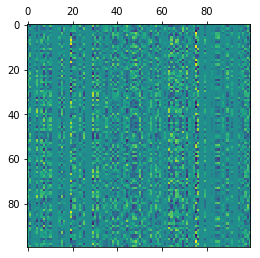

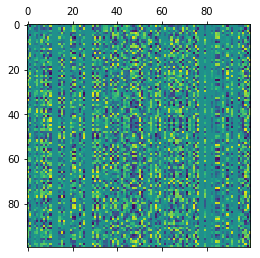

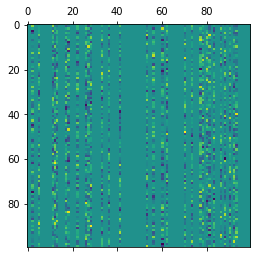

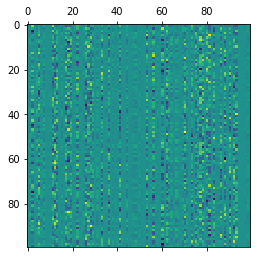

In [206]:
makeplot(L,L_,B,B_)
#plt.matshow(L)
#plt.matshow(L_)
#plt.matshow(B)
#plt.matshow(B_)

Load Video Data

In [246]:
import glob
from PIL.Image import Image

In [241]:
path='/home/pradeep/Downloads/WavingTrees/b*'

In [262]:
def getdata(path):
    D=[]
    for f in sorted(glob.glob(path)):
        img=PIL.Image.open(f)
        img=Image.convert(img,'L')
        newsize=(img.size[0]/4,img.size[1]/4)
        img=np.ravel(np.asarray(Image.resize(img, newsize)))
        D.append(img)
    D=np.asarray(D).T
    return D

In [264]:
D=getdata(path)
print(D.shape)

(1200, 287)


In [274]:
def showimage(col, size):
    img=np.resize(col, size)
    plt.imshow(img, cmap='gray')
    plt.show()

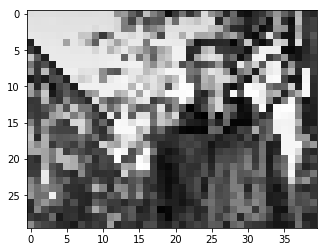

In [278]:
showimage(D[:,250],(30,40))

In [280]:
Ld, Bd=RPCA_LBD(D, 500, 100)

(0, 0.0023635190063598507)
(1, 0.0001594220007005836)
(2, 0.00011261260097343974)
(3, 7.586883462034576e-05)
(4, 5.603293214615892e-05)
(5, 4.355093195837209e-05)
(6, 3.471469528421387e-05)
(7, 2.8032658159912728e-05)
(8, 2.27924628415906e-05)
(9, 1.8596943840043508e-05)
(10, 1.5197534064822652e-05)
(11, 1.2424808139720655e-05)
(12, 1.0155699613272791e-05)
(13, 8.221056285594305e-06)
(14, 6.626118448892496e-06)
(15, 5.3463085599867885e-06)
(16, 4.3270402807695945e-06)
(17, 3.5026004706647078e-06)
(18, 2.853360693102532e-06)
(19, 2.3160664580511424e-06)
(20, 1.8937981500777202e-06)
(21, 1.5412517286688475e-06)
(22, 1.2589751177476794e-06)
(23, 1.0332154222428712e-06)
(24, 8.4221311454771e-07)
(25, 6.898696169251119e-07)
(26, 5.687084585229557e-07)
(27, 4.6469084148623365e-07)
(28, 3.823828072880866e-07)
(29, 3.142968713001998e-07)
(30, 2.579425995183686e-07)
(31, 2.112394621495383e-07)
(32, 1.7502663433391102e-07)
(33, 1.427202139465801e-07)
(34, 1.1799510859239723e-07)
(35, 9.743760293

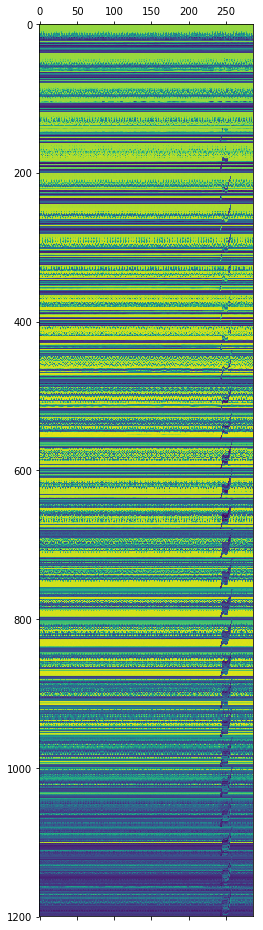

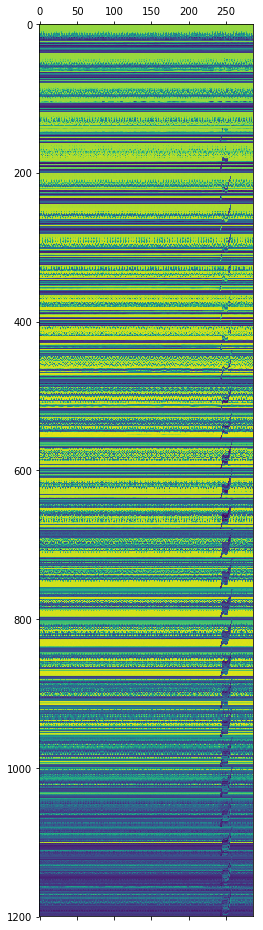

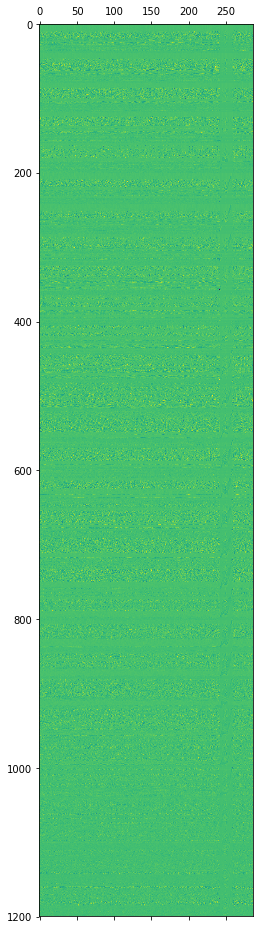

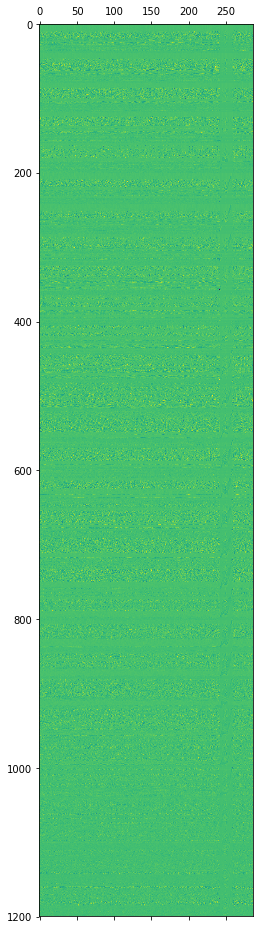

In [281]:
makeplot(Ld,Ld,Bd,Bd)

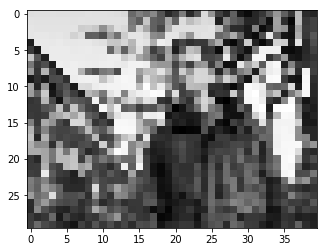

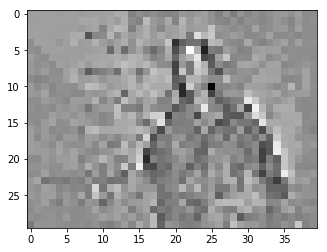

In [282]:
showimage(Ld[:,247], (30,40))
showimage(Bd[:,247], (30,40))

(12.141711215756294, -14.076336308198965, 0.9649996085143149)


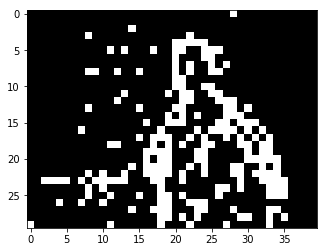

In [319]:
Mask=Bd[:,247].reshape((30,40))
print(np.max(Mask), np.min(Mask), np.mean(Mask))
Mask_=np.heaviside(Mask+1, 0)
plt.imshow(Mask_, cmap='Greys')
plt.show()

In [320]:
ref_path='/home/pradeep/Downloads/WavingTrees/hand_segmented_00247.BMP'
R=getdata(ref_path)

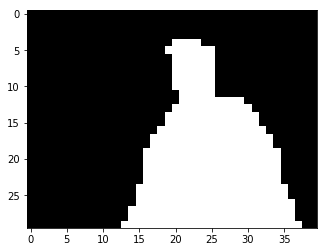

In [321]:
showimage(R, (30,40))